## はじめに

この講義(２コマ)では、
* フリーの統計ソフト「R」とそれを扱うツール「Rstudio」を使い方を覚えながら
* データ解析を実際に実行し
* データ解析の記録を残す

ことを予定していました。

対面講義形式からオンライン講義形式への変更に伴い、ハンズオンの部分を実施することが容易ではなくなりました。

ついては、「R」「Rstudio」の利用に関する部分は、オプションとし、それ以外の内容についての理解と関連課題の提出をもって受講修了とみなすことにします。

ハンズオンに相当するコンテンツには「!!オプション!!」と記して区別します。

## RとRstudioを自分のPCに設定する !!オプション!!

Rはフリーの統計解析ソフトウェア/コンピュータ言語です。

現在、大規模データの医学研究・ライフサイエンス研究では、Rと[パイソン](https://techacademy.jp/magazine/22066)とが２大言語となっています。

どちらの言語も、よく使われるデータ解析手法を実施する上では違いがありません。

もし、どちらか片方を習得するのであれば、統計学・数学の理論的背景などに興味が強ければRを、機械学習などに興味が強ければパイソンを、最初に選ぶのがよいでしょう。

Rは統計学関係者が、パイソンは情報学系関係者が、それぞれ作ってきたということが違いの背景にあります。

[こちらのリンク先](https://qiita.com/hujuu/items/ddd66ae8e6f3f989f2c0)を参考に、自身のPCにRとRstudioをインストールし、立ち上げてみましょう。

## データ解析の記録を残す (オプションではありません)

データ解析では

* 解析するデータを管理する
* データの解析をする(解析アプリケーションを使う)
* 解析アプリケーションの実行ログを記録として残す

ことを実施する必要があります。

解析データは電子ファイルやデータベースとして管理・保管します。

データの解析は、解析アプリケーションを使って実行します。Rを使うのもそのためです。

最後の解析アプリケーションの実行ログを記録として残す、という作業は、結構、厄介です。

実行の手順を、一つ一つ研究記録ノートに書き留めたり、ワープロソフトに打ち込んでファイルとして保存したりすることになります。

この講義で行うう解析の記録も、レポートとして提出することになります。

## Rマークダウン書式で記録を残す !!オプション!!

Rの実行ログがキレイに残せるメリットがあります。

レポート提出が楽になるでしょう。

Rmarkdownによるレポート作成法については[こちら](https://kohske.github.io/R/rstudio/)を参照してください。

パイソンにも同様の仕組み「[パイソンノートブック](https://techacademy.jp/magazine/17430)」があります。

ちなみに、この講義資料はRstudioを用いてRmarkdownという方法で作成しています。

[こちら](https://github.com/ryamada22/atom/blob/master/Lectures2020/C20/haifusiryo.zip)から、この講義資料のRmarkdown形式ファイルがダウンロードできます。

それをダウンロードして、解凍し、Rstudioで開けば、提出レポートの作成はとても簡単になるはずです。

## 帰無仮説検定

### ２つの治療法を比較する

重症コロナウイルス性肺炎患者に、治療薬Aを投与する(A+ = Ayes)のとしない(A- = Ano)のとで、どちらが「良い(２８日後の生存率が高い方を良いとすることにします)」かを記録(K)します。

Ayesの生存者数・死者数が4、6、

Anoの生存者数・死者数が4、5だったとします。

In [1]:
LiveAyes <- 4
DeadAyes <- 6

LiveAno <- 4
DeadAno <- 5

K <- matrix(c(LiveAyes,LiveAno,DeadAyes,DeadAno),2,2)
print(K)

     [,1] [,2]
[1,]    4    6
[2,]    4    5


### 帰無仮説と帰無仮説検定

ここでの「帰無仮説」は、『A+とA-とがもたらす生存率は同じである』です。

ここでの「帰無仮説検定」は、『A+とA-とがもたらす生存率は同じである』という「帰無仮説」の下で、記録Kが得られたという事実が、珍しいか珍しくないかの判定をし(p値に換算し)、「帰無仮説」が「正しくないと言ってもよい(棄却する)」かどうかの判定をすることです。

一般に、「何かしら、『こうなのではないか(A+とA-とでは生存率に差があるのではないか)』と考えているときに、「あえて」、それを否定する側の仮説のことを「帰無仮説」と言います。

得られたデータが、「帰無仮説」を信じるには珍しすぎるか、それほど珍しくないかを検討することを、「帰無仮説検定」と言います。

### 珍しいかどうか、確率・尤度を計算する

「帰無仮説」『A+とA-とがもたらす生存率は同じである』の下で、Kという観察をする珍しさ(確率)を計算したい。

「生存率は同じ」という仮説であって、その生存率は、0.5かもしれないし、0.3かもしれないし、0.3143568かもしれない。

帰無仮説の下でKという観察をする確率の計算は終わらない…

### 帰無仮説の下での確率が簡単に計算できる場合

A+とA-とを生死について比較するのは、かなり簡単なことに思えたけれど、珍しさの計算がそれほど簡単ではないことがわかりました。

もっと計算問題を単純にしてみることにします。

* いかさま師がコイン投げをしてみせている。
* いかさま師の持つコインが、きちんとしたコインである(表と裏の出る確率が0.5ずつである)かどうかを、調べている。

表が3回、裏が7回出た。

きちんとしたコインである(帰無仮説)の下で、(3,7)というデータが得られる確率を計算してみる。

$$
_{10} C_{3} \times  (0.5)^3 \times (0.5)^7 = \frac{10!}{3! \times 7!} (0.5)^{10} = 0.117
$$

この計算からわかることは、
「ちゃんとしたコインを10回投げる実験をしたとすると、100回の実験のうち、12回くらいで、表3回、裏7回となる」
こと。

「そんなに珍しいことではないから、今、試したコインは『ちゃんとしたコインである』という帰無仮説を棄却するようなものではない」

と、そういうこと(だろうか？)。

#### Rで計算してみる !!オプション!!

$3! = 6$ (3の階乗)をRでは、以下のように、factorial() という関数に3という引数を渡して計算する。

In [2]:
factorial(3)

[1] 6

これを使えば、

In [3]:
factorial(10) / (factorial(3) * factorial(7)) * (0.5)^10

[1] 0.1171875

## P値

### 生起確率だけでは帰無仮説検定には不十分

ちゃんとしたコインを10回投げて、表3回、裏7回となる確率が、約0.12。

では、ちゃんとしたコインを1000 回投げて、表498回、裏502回となったとします。

このコインは「ちゃんとして」いると言えますか？

かなりちゃんとしているはずです。

10回投げて、3対7なのは、表裏の回数の差が4と言うことです。

1000回投げて、498対502も表裏の回数の差がたった4ですから。

10回のデータしかないコインよりも、1000回のデータのあるコインの方が、より一層、ちゃんとしていると言えるはずです。

では、その確率(生起確率 "起きる確率")はいくつでしょうか？

$$
_{1000} C_{498} \times  (0.5)^{498} \times (0.5)^{502} = \frac{1000!}{498! \times  502!} (0.5)^{1000} = 0.025
$$

かなり小さいです。

この小さな生起確率から言えることは、「ちゃんとしたコインを1000回投げて、表が498回、裏が502回となる確率はかなり低い」ということです。

また、帰無仮説のもとでの観測データの生起確率は、帰無仮説には不十分であることもわかりました。



#### Rで計算してみる !!オプション!!

大きな数の階乗は計算機には大変すぎます。

大きな数の計算をするときには、対数を取ると便利です。

$$
\frac{1000!}{498! 502!} (0,5)^{1000} = e^{\log(\frac{1000!}{498! 502!} (0.5)^{1000})} = e^{\log{1000!}-\log{498!} - \log{502!} + 1000 \times \log{0.5}}
$$

$\log{3!}$は、Rではlfactorial(3)。

In [4]:
exp(lfactorial(1000)-lfactorial(498)-lfactorial(502) + 1000 * log(0.5))

[1] 0.02502422

### P値とは

帰無仮説のもとでの観測データの生起確率は、帰無仮説には不十分であることもわかりました。

もう一度、小さなスケールで考え直してみることにします。

10回投げて、表3回、裏7回となりました。

他にはどのような場合があるでしょうか？

(表, 裏) = (0,10),(1,9),(2,8),(3,7),(4,6),(5,5),(6,4),(7,3),(8,2),(9,1),(10,0) の11通りの出かたがあります。

それぞれの生起確率を計算してみます。

(0,10),(1,9),(2,8),(3,7),(4,6),(5,5),(6,4),(7,3),(8,2),(9,1),(10,0)のそれぞれの正規確率は

0.001, 0.010, 0.044, 0.117, 0.205, 0.246, 0.205,0.117, 0.044, 0.010, 0.001

となります。

すべての場合を足し合わせると1になります。

#### P値の考え方

今、表3回、裏7回が珍しいかどうかに興味があります。

同程度に珍しいのは表7回、裏3回です。

もっと珍しいのは、表0,1,2回の場合と、裏8,9,10回の場合の、全部で６通りです。

これらを足し合わせた値をP値と言います。

今の場合は、

$$
\sum_{i=0}^3 \frac{10!}{(i)! \times (10-i)!} (0.5)^{10} + \sum_{i=7}^{10} \frac{10!}{(i)! \times (10-i)!}
$$

実際、この値は、0.344となります。

この値が大きければ大きいほど、「ちゃんと」しているという仮説を信じるのが良いですし、小さければ小さいほど、「棄却」するのが適切になります。

P値は必ず0以上になりますし、最も大きい場合に1になります。
それは、生起確率は0以上であり、起こりうるすべての場合の生起確率の和が1だからです。

この方法で1000回の試行で、表498回、裏502回の場合のP値を計算すると、0.924になります。

1000回の試行で確認したコインの方が「ちゃんとしている」と信じる気持ちが強いという実感通り、P値は10回の試行の場合よりも大きくなりました。

#### Rでやってみる !! オプション !!

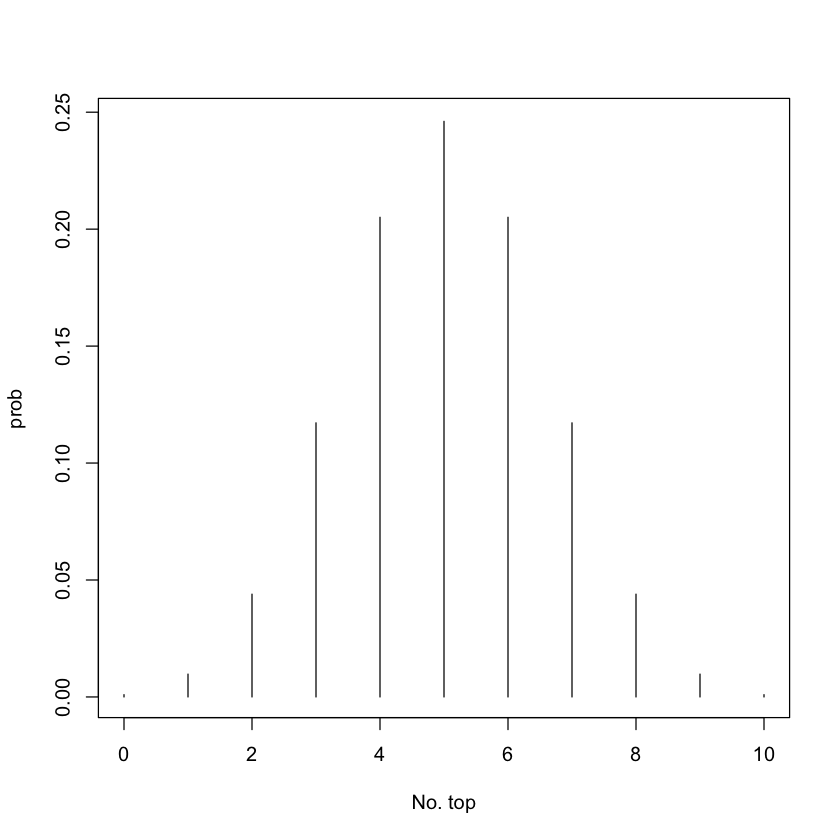

In [5]:
p010 <- factorial(10) / (factorial(0) * factorial(10)) * (0.5)^10
p19 <- factorial(10) / (factorial(1) * factorial(9)) * (0.5)^10
p28 <- factorial(10) / (factorial(2) * factorial(8)) * (0.5)^10
p37 <- factorial(10) / (factorial(3) * factorial(7)) * (0.5)^10
p46 <- factorial(10) / (factorial(4) * factorial(6)) * (0.5)^10
p55 <- factorial(10) / (factorial(5) * factorial(5)) * (0.5)^10
p64 <- factorial(10) / (factorial(6) * factorial(4)) * (0.5)^10
p73 <- factorial(10) / (factorial(7) * factorial(3)) * (0.5)^10
p82 <- factorial(10) / (factorial(8) * factorial(2)) * (0.5)^10
p91 <- factorial(10) / (factorial(9) * factorial(1)) * (0.5)^10
p100 <- factorial(10) / (factorial(10) * factorial(0)) * (0.5)^10

ps <- c(p010,p19,p28,p37,p46,p55,p64,p73,p82,p91,p100)
plot(0:10,ps,type="h",xlab = "No. top", ylab="prob")

すべての場合の生起確率を足し合わせると1になります。

In [6]:
sum(ps)

[1] 1

P値は

In [7]:
p.value <- p010 + p19 + p28 + p37 + p73 + p82 + p91 + p100
print(p.value)
# または、sum(ps[c(1:4,8:11))

[1] 0.34375


##### R言語の繰り返し処理もやってみる !! オプション !!

似たような処理を繰り返して書くのは面倒くさいので、11通りの計算を、表の回数だけ変化させて、繰り返し処理で計算すると便利です。

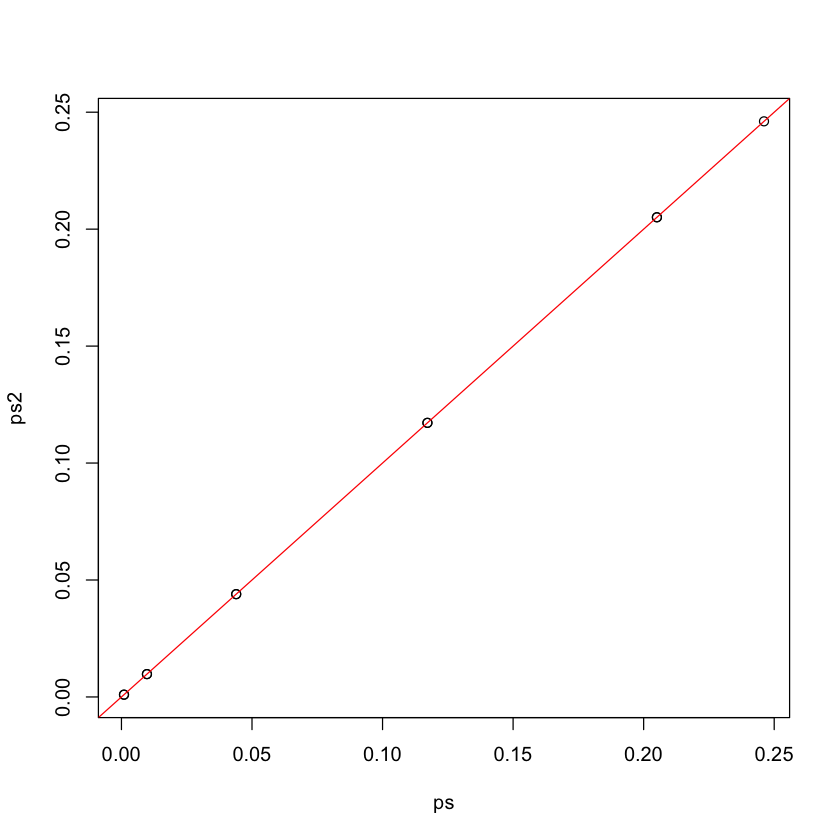

In [8]:
ps2 <- rep(0, 11) 
for(i in 1:11){
  n.omote <- i-1
  ps2[i] <- factorial(10) / (factorial(n.omote) * factorial(10-n.omote)) * (0.5)^10
}
plot(ps,ps2) # べたに計算した場合と同じ結果が得られる。
abline(a = 0, b = 1,col="red") # y = b * x + a の直線を補助線として引きます

これなら、1000回の試行の場合でもできます。

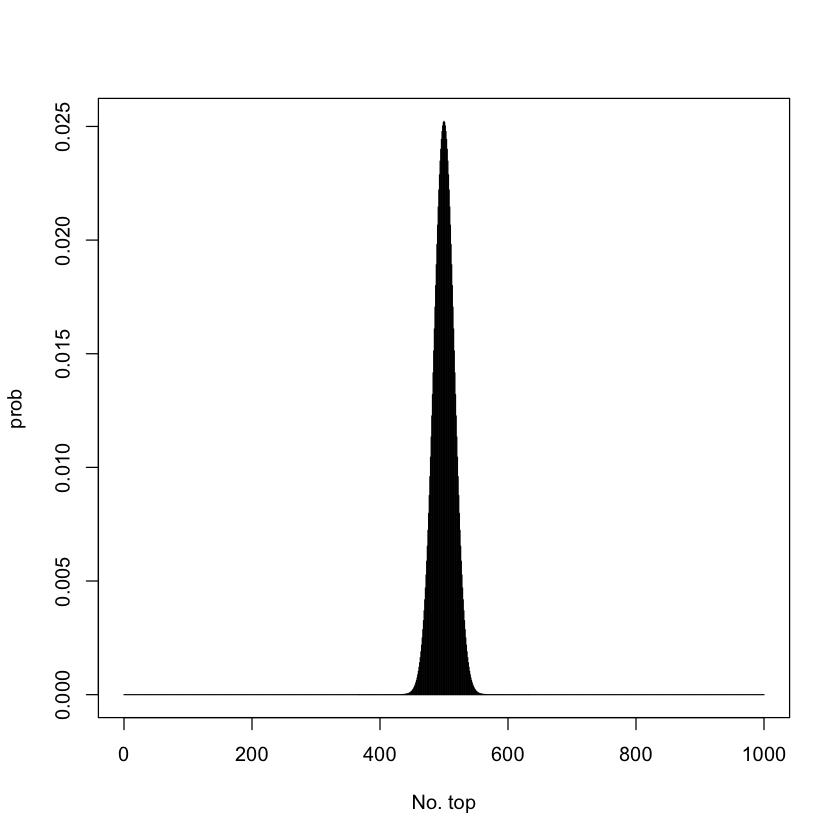

In [9]:
ps3 <- rep(0,1001)
for(i in 1:1001){
  n.omote <- i-1
  ps3[i] <- exp(lfactorial(1000)-lfactorial(n.omote)-lfactorial(1000-n.omote) + 1000 * log(0.5))
}
plot(0:1000,ps3,type="h",xlab = "No. top", ylab="prob")

In [10]:
sum(ps3) # 1になります

[1] 1

In [11]:
p.value <- sum(ps3[c(0:499,503:1001)])
print(p.value)

[1] 0.9244256


## 治療法の良し悪しを判定する

いかさま師のコインのことがわかっても、医学データには使えません。

元の問題に戻りましょう。

重症コロナウイルス性肺炎患者に、治療薬Aを投与する(A+ = Ayes)のとしない(A- = Ano)のとで、どちらが「良い(２８日後の生存率が高い方を良いとすることにします)」かを記録(K)します。

Ayesの生存者数・死者数が4、6、

Anoの生存者数・死者数が4、5だったとします。

In [12]:
print(K)

     [,1] [,2]
[1,]    4    6
[2,]    4    5


「帰無仮説」『A+とA-とがもたらす生存率は同じである』の下で、Kという観察をする珍しさ(確率)を計算したい。

「生存率は同じ」という仮説であって、その生存率は、0.5かもしれないし、0.3かもしれないし、0.3143568かもしれない。

帰無仮説の下でKという観察をする確率の計算は終わらない…

ここで、観察Kを 2x2 表と呼びますが、上段(第1行)は、A+の生死者数、下段(第2行)はA-の生死者数、第1列は、生存者数、第２列は死者数です。

帰無仮説を『A+とA-との人数はそれぞれ10人と9人であり、生存者の合計は8人、志望者の合計は11人である。この全19人をA+10人、A-9人に割り振り、生存8人、死亡11人に割り振ったとして、A+・A-の割り振りと生存・死亡の割り振りは、お互いに別々に(独立に)、ランダム行われた』と読み替えてみます。

この場合は、A+、A-の生存率を仮定する必要がないので、確率を計算することができます。

この確率を用いて、A+・A-と生存・死亡とが無関係なのか、A+だと生存割合が高くなるのか・逆に低くなるのか、に関して、帰無仮説検定ができることになります。

検定ではP値を求めますが、その方法の一つがフィッシャーの正確確率検定と呼ばれる方法です。

フィッシャーの正確確率検定が方法として適切な理由などは、統計学・統計解析の講義等で勉強しましょう。
ここでは、フィッシャーの正確確率検定が、この用途に使えることに納得していることを前提にして、話を進めます。

この場合に、同じ帰無仮説検定のためにカイ二乗検定という方法も使えることも知っていて良いでしょう。

## 手法を決めて帰無仮説検定をする

フィッシャーの正確確率検定は、頑張れば手計算ができますが、アプリケーションを使うのが一般的でしょう。、

Rでは次のように行います。

In [13]:
K <- matrix(c(4,4,5,6),2,2)
K
fisher.test(K)

4,5
4,6



	Fisher's Exact Test for Count Data

data:  K
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  0.1364855 10.5424045
sample estimates:
odds ratio 
  1.188511 


P値が1であると答えが返ってきました。

## 結果を記録する

データ解析では

* 解析するデータを管理する
* データの解析をする(解析アプリケーションを使う)
* 解析アプリケーションの実行ログを記録として残す

ことを実施する必要があります。

と今日の講義の冒頭で説明しました。

解析データは(4,5),(4,6)の4つの数値です。

データ解析は、今、実施したところです。その結果、P値は1でした。

最後に、解析アプリケーションの実行ログを記録として残す必要があります。

### 記録の例１

その例を示します。

A+ での生存・死亡数はそれぞれ、4人、6人であった。
A- での生存・死亡数はそれぞれ、4人、5人であった。

フィッシャーの正確確率検定でA+、A-と生存・死亡との独立性の検定を行った。

検定はRのfisher.test()関数を使用した。

結果はP値が1っであった。

### 記録の例２

Rmarkdownを使えば、以下のように書いておけば、解析の実施そのものと、その記録が一体となっていて、まぎれもないし、やり直しも簡単です。


In [15]:
A+ での生存・死亡数はそれぞれ、4人、6人であった。
A- での生存・死亡数はそれぞれ、4人、5人であった。

ERROR: Error in parse(text = x, srcfile = src): <text>:1:8:  想定外の入力です 
1: A+ での生存<e3>
           ^


In [16]:
K <- matrix(c(4,4,6,5),2,2)
out <- fisher.test(K)
print(out)
out$p.value


	Fisher's Exact Test for Count Data

data:  K
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.09485502 7.32678771
sample estimates:
odds ratio 
  0.841389 



[1] 1

### ｶｲ二乗検定 !! オプション !!

Rでｶｲ二乗検定をしてみます。

Rの関数を変えるだけです。

In [17]:
chisq.test(K)

Warning message in chisq.test(K):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test with Yates' continuity correction

data:  K
X-squared = 5.2043e-32, df = 1, p-value = 1


## オッズ比

A+の群で、生存者が4人、死亡者が6人でした。

生存者の割合は、

$$
4 / (4 + 6 ) = 0.4 
$$
この数値は0から1の値を取り、1に近ければ近いほど、好成績です。

別の指標もあります。

オッズと呼ばれます。

生存するか、死亡するか、どっちが多いか、という気持ちを表したものです。

$$
4 / 6 = 0.66667
$$
と計算されます。

オッズが1であれば、生存するか死亡するか、同じ割合になり、オッズが1より大きければ大きいほど、好成績となります。

A-群のオッズは

$$
5 / 6 = 0.83333
$$
です。

A+群とA-群との成績を、両群のオッズを比較して評価することがあります。

オッズを比較するときに、比を取ることが多いです。

オッズの比なので、オッズ比と呼ばれます。

$$
( 4/ 6 ) / ( 4 / 5 ) = (4 \times 5 ) / (6 \times 4 ) = 0.83333
$$

です。

オッズ比が1より小さいことから、大雑把に言って、A-群の方が好成績っぽいことが示唆されています。

A+群の生存(対 死亡)オッズは、A-の0.83倍だ、と読みます。

## オッズ比は違うことを前提に考えている

帰無仮説検定では2群に違いがないことを帰無仮説として仮定するところから出発していました。

オッズ比を計算するときには、オッズ比がいくつになるのかを気にしています。

言い換えると、オッズ比が1でない値になることを前提にして計算しています。

オッズ比が1になるときに、「2群は同じ～帰無仮説が成り立つ～」ので、オッズ比が1にならないことを前提に計算しているときには、「２群の成績に違いがあることを前提として、どっちがどのくらい成績がよいのか？」を気にしています。

## オッズ比と点推定値

オッズ比は、4つの数値 ((4,6),(4,5))から、掛け算と割り算で計算されました。

オッズ比を計算しながら、本当に知りたいことは、A+群とA-群とで、どちらが何倍、生存 vs. 死亡のオッズが高いか、ということです。

たまたま、19人を調べたら、0.8333というオッズ比が得られました。

しかしながら、本当に知りたいのは、A+群とA-群とにとてもたくさんの患者さんが割り当てられたときに、どちらの群の生存オッズが何倍高いか(低いか)です。

したがって、$ (4/6)/(4/5) $で計算された、値は、2群の真の良し悪しの値を、推定したものにすぎません。

推定したい対象として、ただ1つの値を算出するとき、その値を、「点推定値」と言います。

推定結果として、あえて、1つの数値で表すなら、この値、というのが、「点推定値」です。

※　注意　※

このシンプルな計算によって求めたものが、「標本に基づく(単純な)オッズ比」です。どちらの群がどれだけ割合的に良いか、の「点推定値」の算出方法としては、他にも複数の手法が存在します。

## オッズ比と区間推定値

推定は、常に推定であって、これこそが真の値、と言い切れないものです。

したがって、推定するときには、このくらいの範囲だろう、という推定結果の提示の仕方もあります。

そのように推定対象の範囲を算出することを「点推定」に対して「区間推定」と呼びます。

オッズ比の点推定値の算出方法として、最も単純な方法を紹介し、他にも方法があることを付言しましたが、区間推定方法にも複数の方法が提唱されています。

例えば、Wald法と呼ばれる方法で計算すると

95% 信頼区間と呼ばれる範囲が小さい側の値として0.1343981、大きい側の値として5.167069、となります。

## 区間推定値の結果とその算出ログを記録する

このとき、データ解析の記録としては、次のように書くことになります。

手法を明記しないと、結果を再現できないので、手法についても書きます。

また、何を用いて計算したかも書かなければなりません。

オッズ比は、標本に基づいて、2群のオッズの比を計算し、点推定値を求めた。
その結果、0.83333となった。
また、信頼区間は、Rのepitoolsパッケージのoddsratio()関数を用いて、区間推定手法として"wald”法を選んで、算出した。

その結果、[0.1343981, 5.167069] が得られた。

このように書くのは面倒くさいですが、Rmarkdownで書けば、次のようにするだけです。

In [19]:
library(epitools) # パッケージepitoolsを使う
out <- oddsratio(K,method="wald") # oddsratio()関数を使い、methodとして"wald"法を指定する
print(out)

Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”


$data
          Outcome
Predictor  Disease1 Disease2 Total
  Exposed1        4        6    10
  Exposed2        4        5     9
  Total           8       11    19

$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8333333 0.1343981 5.167069

$p.value
          two-sided
Predictor  midp.exact fisher.exact chi.square
  Exposed1         NA           NA         NA
  Exposed2  0.8599667            1  0.8446744

$correction
[1] FALSE

attr(,"method")
[1] "Unconditional MLE & normal approximation (Wald) CI"


### オッズ比の区間推定をRでやってみる !! オプション !!

Rをインストールすると、多くの解析関数がすぐに使える状態になります。

この資料でこれまでに使ってきた、fisher.test()関数はそのような、インストールするだけで使える関数の1つです。

オッズ比の区間推定を、手法を選んで実行するには、追加の関数が必要です。

Rで機能を追加するときには、パッケージのインストールをします。

今、使いたい関数はepitoolsというパッケージに入っています。

[こちら](https://syunsuke.github.io/r_install_guide_for_beginners/05_installation_of_packages.html)に、パッケージのインストール方法が書かれています。

これを参考にepitoolsパッケージをインストールしてみましょう。

そのうえで、

In [20]:
library(epitools)

と打ち込んで、epitoolsパッケージを使えるようにします。

In [21]:
oddsratio(K,method="wald")

Warning message in chisq.test(xx, correct = correction):
“Chi-squared approximation may be incorrect”


,Disease1,Disease2,Total
Exposed1,4,6,10
Exposed2,4,5,9
Total,8,11,19
,estimate,lower,upper
Exposed1,1.0000000,NA,NA
Exposed2,0.8333333,0.1343981,5.167069
,midp.exact,fisher.exact,chi.square
Exposed1,NA,NA,NA
Exposed2,0.8599667,1,0.8446744


出力はいろいろありますが、今、知りたかったのは、

In [22]:
$measure
          odds ratio with 95% C.I.
Predictor   estimate     lower    upper
  Exposed1 1.0000000        NA       NA
  Exposed2 0.8333333 0.1343981 5.167069

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1:  予想外の '$' です 
1: $
    ^


の部分です。

これは、上段(A+)をExposed1と呼び、下段(A-)をExposed2と呼んでいます。

上段を基準としているので、上段の推定値(esimate)を1に固定し、それには、区間がない(lower値とupper値がない)です。

それに対して、下段の群のオッズ比の点推定値が0.8333333、95%信頼区が下 0.134981、上5.167069と計算されていることがわかります。

なお、この関数では、2x2表の第2列になる(死亡する)ことが、第1列になる(生存する)ことに対して、第2群のオッズが第1群のオッズに対して何倍かが計算されるので、このようになりますが、これは、第1群で生存するオッズが第2群に比べて何倍かと同じことであることに注意します。

## 区間推定と統計的有意差の関係

オッズ比の推定では、帰無仮説のことを気にせずに点推定値を求め、区間推定範囲も計算しました。

しかしながら、推定と帰無仮説検定とは無関係ではありません。

オッズ比が1に近いことと、帰無仮説らしいこととは関係しています。

また、信頼区間・区間推定を95%で行うことの意味は、P値の棄却水準を0.05 (0.05は5%に対応)することと、対応しています。

したがって、区間推定をしたときに、その区間に帰無仮説に対応する値(オッズ比の推定であれば、1)が含まれていれば、それに相当する棄却水準に照らして、統計学的に有意な結果である、という解釈をされることもあります。

今回のオッズ比の例では、95%信頼区間が0.1343981から5.167069となっており、1をまたぎ、かなり広いので、2群が統計的有意差を持って1とは異なるリスク比を持つとは考えない、と解釈されます。

それは、帰無仮説検定が却水準0.05で棄却されなかったことと、「おおよそ」同じ解釈になります。

## 生存解析

### 確率モデル

2群の生存・死亡のオッズとその比を推定しました。

逆に、それらを仮定することが、データ解析・データ解釈の背景であることがわかります。

その考え方を生存解析に当てはめて検討します。

### もっとも簡単な生存解析用モデル

2つの治療法の効果を生存解析で比較することを考えます。

2つの治療群AとBとについて、次の仮定をします。

A群、B群では、治療開始から毎日、それぞれの治療群の人は一定の確率$p_a,p_b$で死亡します。

ちなみにこれは原子核崩壊と同じ挙動になります。個々の原子核が個人に相当し、崩壊という事象が死亡という事象に対応します。

## 生存解析のデータ

生存解析に必要なデータは

* 割り付けられた群
* 治療開始から死亡までの時間(通常の生存解析では、「まだ生存している」という患者が含まれますが、この講義では、すべての患者につき、死亡まで追跡したことにします)
* 追跡終了時点での、「生死」の区別（この講義では、全患者について、死亡まで追跡しますので、すべての患者の追跡終了時点での「生死」情報は「死」になります）

group | time | state(Alive=0,Dead=1)
--- | ---- | ---
A | 4 | 1 
A | 2 | 1 
A | 22 | 1
A | 19 | 1
A | 17 | 1
A | 11 | 1
B | 2 | 1
B | 11 | 1
B | 4 | 1
B | 14 | 1
B | 3 | 1
B | 3 | 1
B | 7 | 1
B | 10 | 1
B | 5 | 1
B | 1 | 1
B | 2 | 1
B | 7 | 1
B | 8 | 1
B | 4 | 1
B | 1 | 1
B | 2 | 1

## 生存解析を実行する

### データの入力

生存解析は、解析ソフトウェアで実行します。

群、生存時間、生死状態の３つの情報を入力します。

まずは群。

In [23]:
# A 6人、B 17人です
group <- c("A","A","A","A","A","A","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B")
# このようにすることもできます。
# group <- c(rep("A",6),rep("B",17))
group

[1] "A" "A" "A" "A" "A" "A" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[20] "B" "B" "B" "B"

次に、時間。

In [24]:
time <- c(4,2,22,19,17,11,2,11,4,14,3,3,7,10,7,5,1,2,7,8,4,1,2)
time

[1]  4  2 22 19 17 11  2 11  4 14  3  3  7 10  7  5  1  2  7  8  4  1  2

最後に、状態。

In [25]:
state <- c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)
# state <- rep(1,23)

### エクセルファイルからRにデータを読み込む !! オプション !!

23人分のデータを打ち込むのは、面倒くさいですし、打ち間違いの危険も高いです。

例えば、エクセルにデータを記録し、それをRに読み込ませることができると便利でしょう。

そんなことに興味がある人は[こちら](https://datumstudio.jp/blog/r%E3%81%A7excel%EF%BC%88xlsx%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%EF%BC%89%E3%82%92%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%82%80)を参考に、試してみましょう。

### 生存解析の実行

Rのパッケージ survival を使い、次のようにすると、生存解析ができると知ったとしましょう。

その通りにやってみます。

まず、survivalパッケージをインストールします。

その上で、

In [26]:
library(survival) # survivalパッケージを読み込んで使える状態にします
# 入力して作った、group,time,stateから、survivalパッケージが扱いやすい形式にします
# timeとstateの入力情報をSurv()という関数で処理して、Surv.dataという形式に直します
Surv.data <- Surv(time,state)
# それを、群ごとに分けて、生死の時間変化解析を実施します
# survfit()という関数がそれをしてくれます
# survfit()関数に、timeとstateの情報からできたSurv.dataをgroupとgroupを "~"でつなぐことで
# 生死の時間変化について、groupで区別しながら解析せよ、と教えています
surv.out <- survfit(Surv.data ~ group)

Warning message:
“package ‘survival’ was built under R version 3.6.2”

Attaching package: ‘survival’


The following object is masked from ‘package:epitools’:

    ratetable




#### サバイバルカーブを描く

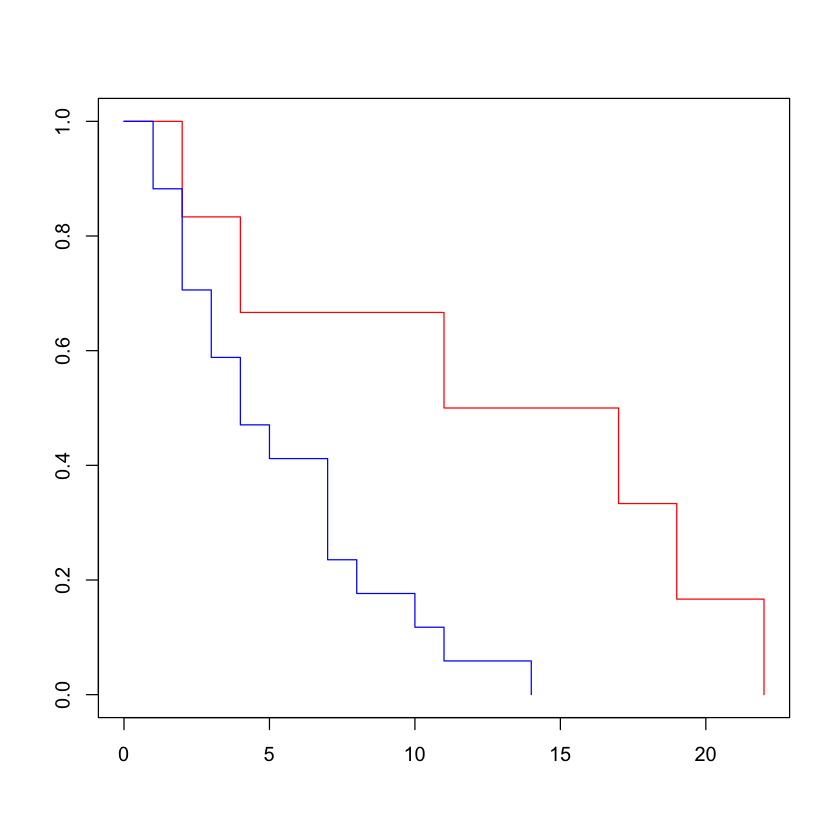

In [27]:
# その結果をプロットします。2群の色を赤と青に指定しています。
plot(surv.out,col=c("red","blue"))

これで、サバイバルカーブが描けました。

全員について、死亡まで追跡しているので、2本のサバイバルカーブが、生存率0になって終わっていることに気づきます。

#### 群間の違いについて検定する

生死の現れ方について、2群間で違いがないという帰無仮説を検定してみます。

複数の方法が知られていますが、「ログ・ランク検定」と呼ばれる方法でP値を出してみることにします。

そのためには、survdiff()関数を用いて、rhoという引数を0に指定することを習えば、実行できます。

In [28]:
test.out <- survdiff(Surv.data ~ group,rho = 0)
test.out

Call:
survdiff(formula = Surv.data ~ group, rho = 0)

         N Observed Expected (O-E)^2/E (O-E)^2/V
group=A  6        6     10.8      2.16      6.08
group=B 17       17     12.2      1.92      6.08

 Chisq= 6.1  on 1 degrees of freedom, p= 0.01 

## 生存解析の解析結果と解析ログの記録

In [29]:
A群6人、B群17人の治療開始から死亡までの完全追跡データを収集した。
データは、●●に××というファイルで保管した。
生存解析では、サバイバルカーブを描き、群間の生存曲線の差に関する有意差検定は、ログ・ランク法を用いた。
解析には、Rのsurvivalパッケージを用いた。
ログ・ランク検定の実行のために、survivalパッケージのsurvdiff()関数のrhoオプションを0に指定した。
その結果、P値が0.01となった。

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5:  想定外の入力です 
1: A群6人<e3>
        ^


これを、Rmarkdownで記録しておくなら、以下のように書いておけば、再現性も担保され、記載も簡単です。

Call:
survdiff(formula = Surv.data ~ group, rho = 0)

         N Observed Expected (O-E)^2/E (O-E)^2/V
group=A  6        6     10.8      2.16      6.08
group=B 17       17     12.2      1.92      6.08

 Chisq= 6.1  on 1 degrees of freedom, p= 0.01 

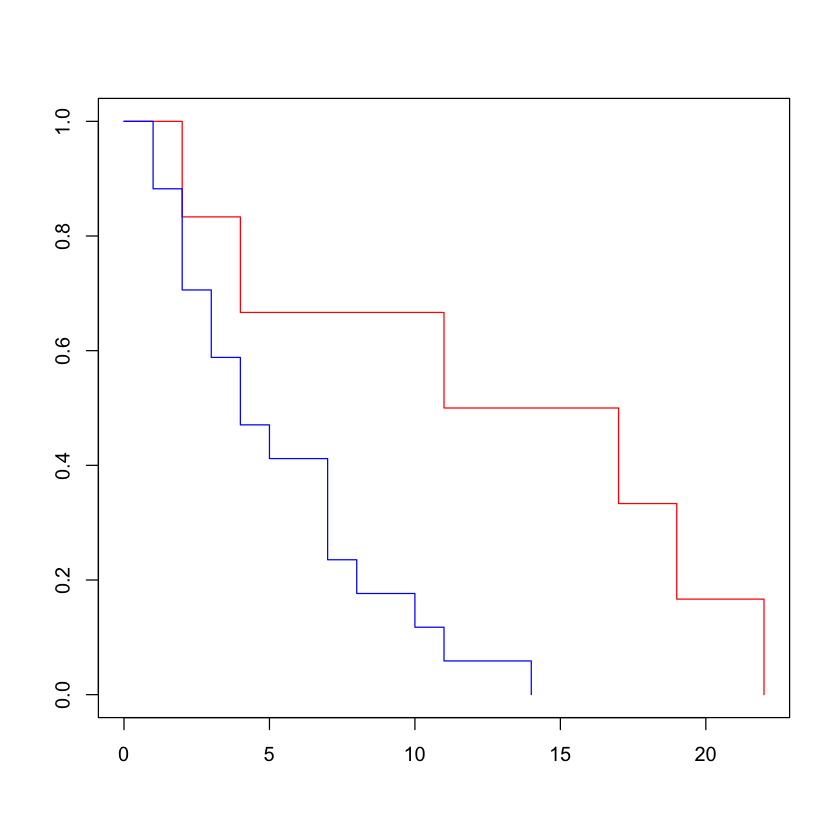

In [30]:
# データの入力
# ここで、エクセルファイルを読み込むコマンドを書いてももちろん良いです
group <- c(rep("A",6),rep("B",17))
time <- c(4,2,22,19,17,11,2,11,4,14,3,3,7,10,7,5,1,2,7,8,4,1,2)
state <- c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)

# 解析
library(survival) # survivalパッケージを読み込んで使える状態にします
Surv.data <- Surv(time,state)
surv.out <- survfit(Surv.data ~ group)

# サバイバルカーブの描画
plot(surv.out,col=c("red","blue"))
# ログ・ランク検定
test.out <- survdiff(Surv.data ~ group,rho = 0)
test.out

### Rでシミュレーションしてみる !! オプション !!

A群では、毎日、10%の確率で死亡するとします。

何日目に死亡するかをシミュレーションしてみます。

ある日に死亡するかしないかは、0（死亡しない）、1（死亡する）のいずれかを、確率、0.9 vs. 0.1 で発生すればよいです。

In [31]:
# 乱数を使ったデータ生成ですが、上の例と同じデータが生成されるように、乱数発生の仕方をコントロールするためのおまじないです
set.seed(123456)

pa <- 0.1
# (0または1)を確率(1-pa,pa)で選んで乱数発生する。ただし、発生する乱数の数は1個
sample(c(0,1),1,prob=c(1-pa,pa),replace=TRUE) 

[1] 0

1日目から、100日目まで、これを繰り返してみます。

In [32]:
s <- sample(c(0,1),100,prob=c(1-pa,pa),replace=TRUE) 
s

[1] 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [75] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

人の死亡という事象は一度しか起きませんから、最初に1が現れた日が死亡日になります。

which.max()という関数は、ベクトルの最大値が何番目の要素であるかを返す関数です。

最大値は1しかないので、これにより死亡日がわかります。

In [33]:
which.max(s)

[1] 8

もう一人については、1度目の死亡から2度目の死亡までの期間とみなしてもよいので、結局、1が立っている番地の差をたくさん集めれば、それが、死亡までの日数の分布になります。

In [34]:
one.address <- which(s==1) # 1が立っている番地を取り出す
diff.one.ad <- diff(one.address)
diff.one.ad

[1]  4  2 22 19 17 11

B群では、日々の死亡確率が0.2とします。

In [35]:
pb <- 0.2
sb <- sample(c(0,1),100,prob=c(1-pb,pb),replace=TRUE) 
one.address.b <- which(sb==1) # 1が立っている番地を取り出す
diff.one.ad.b <- diff(one.address.b)
diff.one.ad.b

[1]  2 11  4 14  3  3  7 10  7  5  1  2  7  8  4  1  2

## 課題

以下の２つの課題を電子ファイルに保存し、PandAの課題として提出しなさい。

### 課題１　2x2表用のデータを入手し、それにフィッシャーの正確確率検定を実行し、その結果と、解析ログの報告書を書く

自身の学籍番号から、次の要領で、2x2表の4つのセルの値を生成せよ。

例：
学籍番号が
601234567
の場合
60 123 45 67 の4つが与えられるものとする。

なお、フィッシャーの正確確率検定の実行方法として、本講義ではRによる例を示したが、それ以外の方法で実行しても、構わない。

いずれの方法で実行するにせよ、報告書には、使用したソフトウェア名、実行ログを記載し、報告書を読んだ他人が再実行できるように記載すること。

### 課題２　論文の検定・推定結果を読む

末尾にリンクを張った論文の

データ解析ログとして残しておくべき情報から抽出されたものが、Methods Statistical analysisの節とResultsにあります。
そのような情報に対応すると思われる解析手法・解析ツールに関する用語・表現を抜き書きしなさい。

用語を知らなくても構いません。

抜き書きした用語・表現のうち、よく知らない用語・表現は、この論文の解析方法と結果を理解するための調べ物をするとっかかりになります。

この先、データ解析の手法・結果については、誰かに教えてもらうものではなく、自分で必要に応じて調べるものであると覚悟して、何が必要かをまずリストアップし、それを調べることを繰り返してください。

[Remdesivir in adults with severe COVID-19: a randomised, double-blind, placebo-controlled, multicentre trial](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)31022-9/fulltext)
